In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd

from wofost_utils import *

/home/ucfajlg/.local/lib/python3.6/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)
/home/ucfajlg/anaconda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(734197.0, 734446.05)

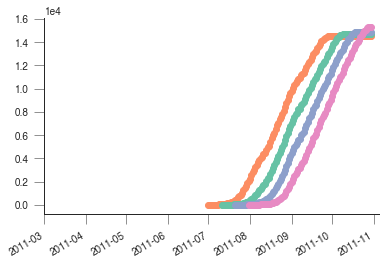

In [3]:
meteo="Ghana"
crop="maize"
variety="Maize_VanHeemst_1988"
soil = "ec4.new"
mgmt="ghana_maize.amgt"

sowing_date = datetime.date(2011, 7, 1)
parameters, agromanagement, wdp = set_up_wofost(meteo, crop, variety, soil, mgmt, 
                                                wav=0, co2=400, rdmsol=100.)

while sowing_date < datetime.date(2011, 8, 1):
    agromanagement[0][datetime.date(2011, 1, 1)]['CropCalendar']['crop_start_date'] = sowing_date
    df_results, simulator = run_wofost(parameters, agromanagement, wdp,
                                      potential=False)
    sowing_date += datetime.timedelta(days=10)
    plt.plot_date(df_results.index, df_results.TAGP)
#fig.autofmt_xdate()
plt.gcf().autofmt_xdate()
plt.gca().fmt_xdata = matplotlib.dates.DateFormatter('%Y-%m-%d')
plt.xlim(datetime.date(2011, 3, 1))

# Things to do

* Plot meteo inputs
* Allow the user to select different sowing dates
* Allow the suer to select different years
* Change model parameters e.g. WAV, TSUM1, TSUM2, CVO (maybe)
* Wrap this in ipywidgets

In [19]:
df_results.columns

Index(['DVS', 'LAI', 'TAGP', 'TWSO', 'TWLV', 'TWST', 'TWRT', 'TRA', 'RD', 'SM',
       'WWLOW'],
      dtype='object')